In [324]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt


In [325]:
#1a,b

a=pd.read_csv('/Users/abelabykuriakose/Downloads/Car name.csv')
b=pd.read_json ('/Users/abelabykuriakose/Downloads/Car-Attributes.json')

In [326]:
#1.c
c=a.join(b)

In [327]:
c


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


In [328]:
#1d. Check 5-point summary of the new DataFrame.- full summary of the data mentioned below
#it has the min 25%,50%,75%, max details.

c.describe().transpose()



,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [329]:
#2A

percentnull = c.isnull().sum() * 100 / len(c)
print(percentnull)

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64


In [330]:
#2B
dupe=c.duplicated()
sum(dupe)

0

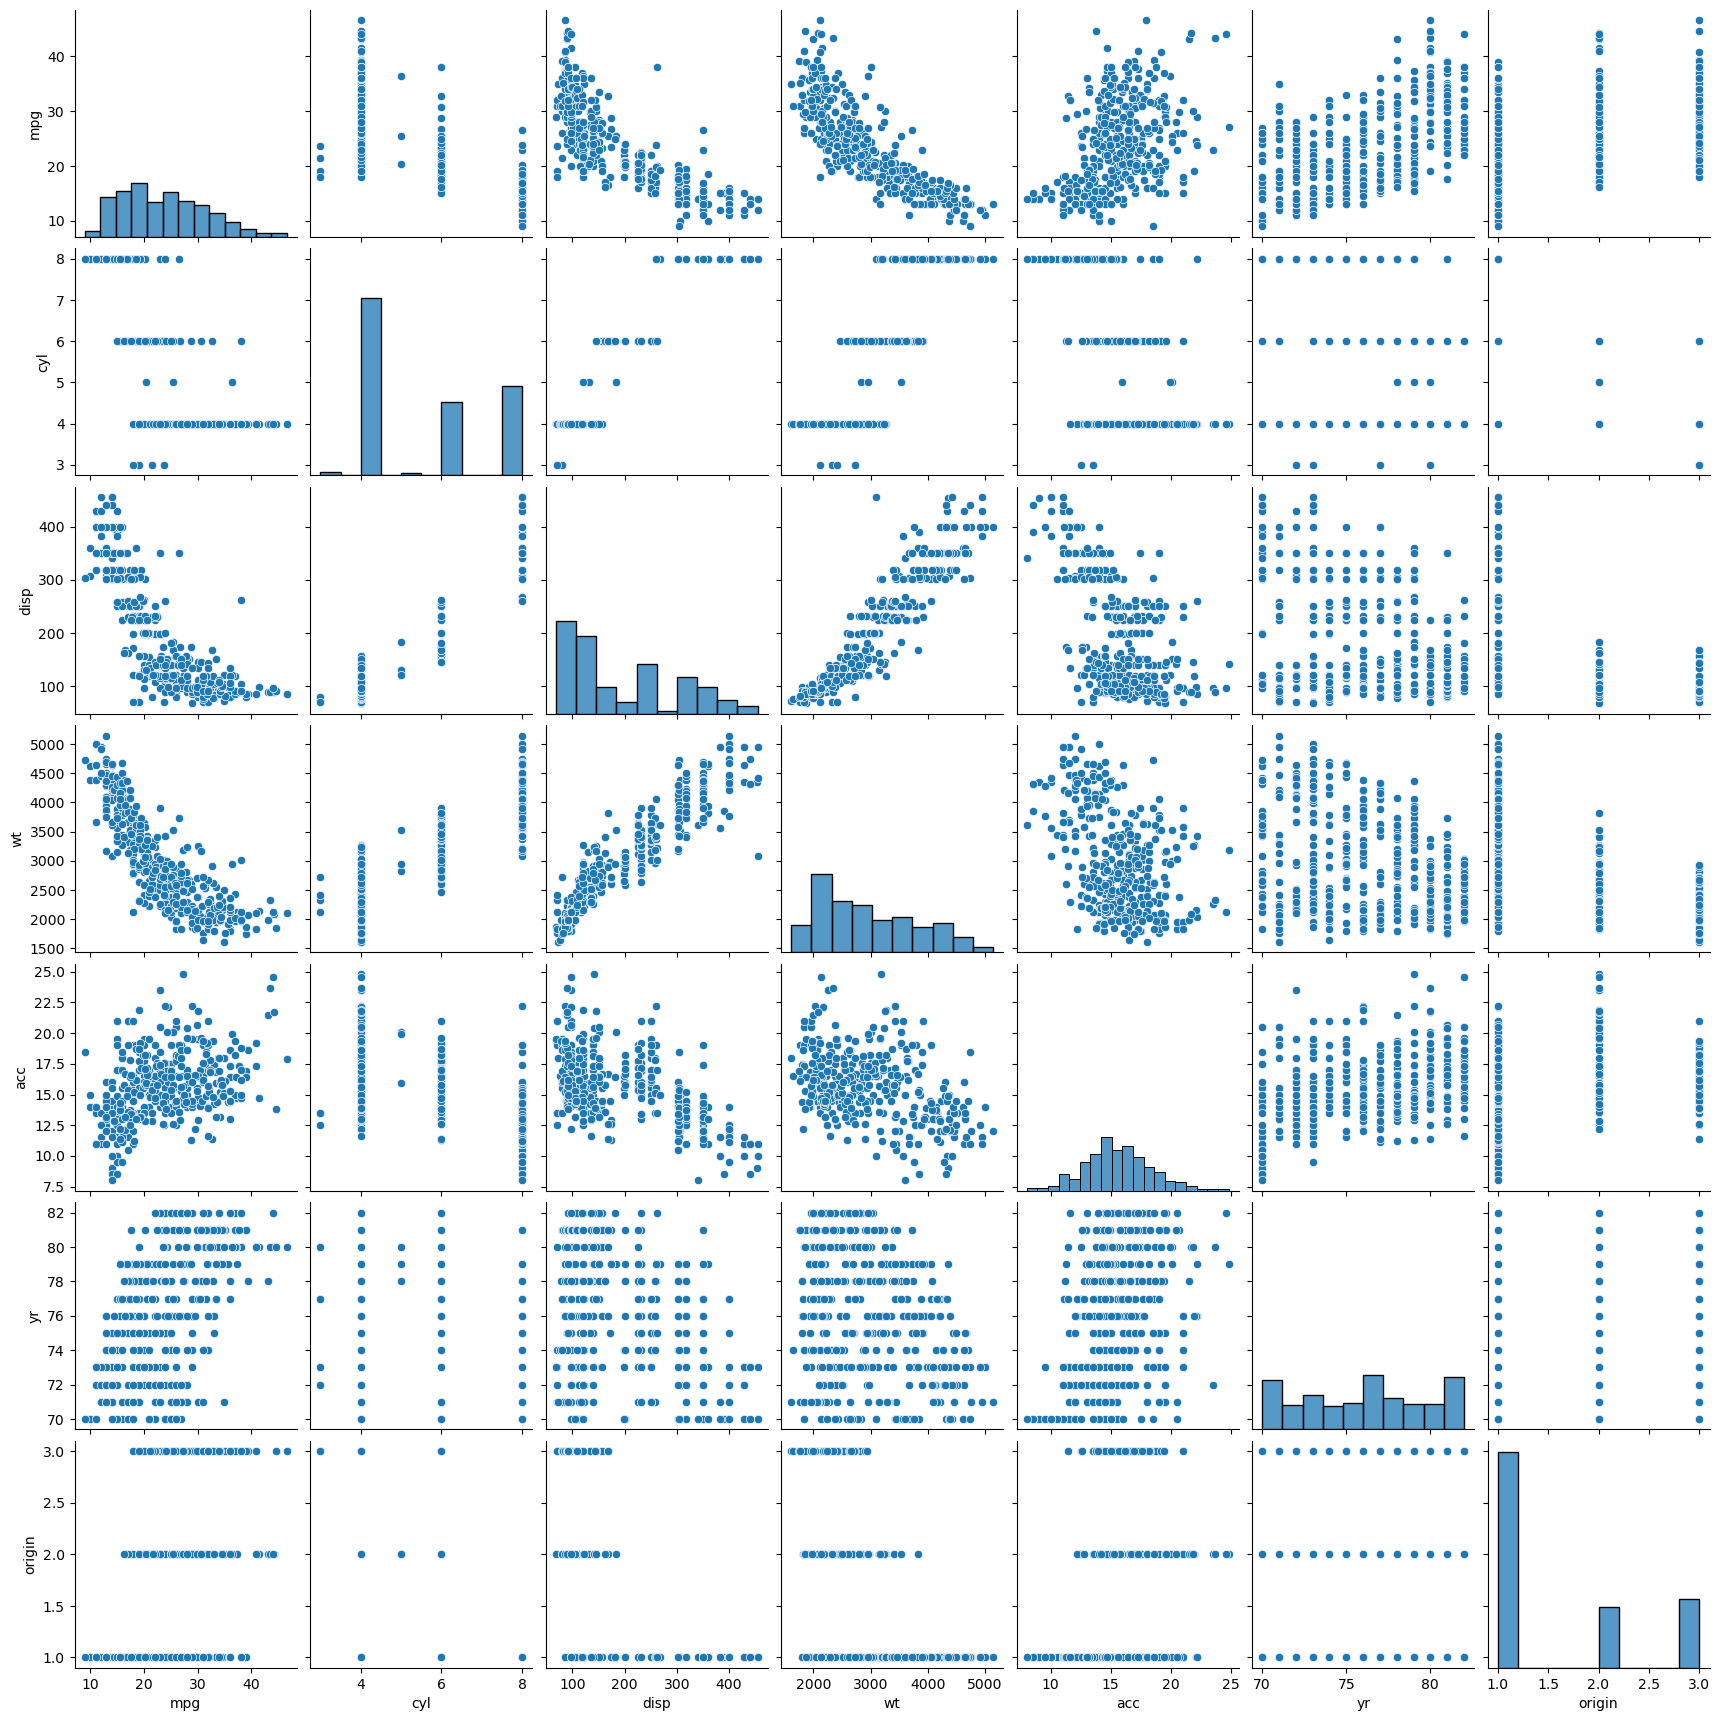

In [331]:
#2c
sns.pairplot(c)

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wt', ylabel='disp'>

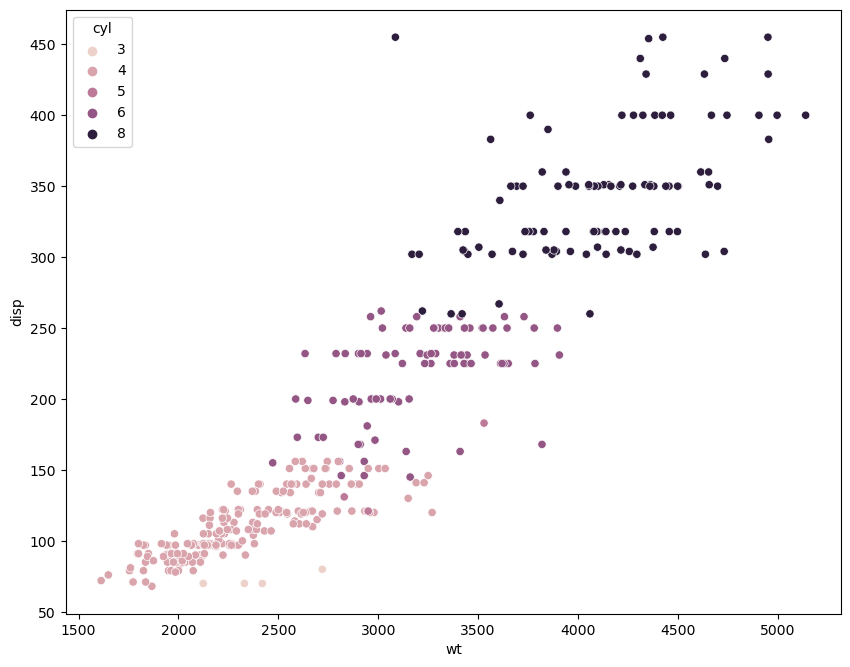

In [332]:
#2d
sns.scatterplot(c['wt'], c['disp'],hue=c['cyl'])

#2e. wt and disp has a linear upward trend overall(directly proportional). As wt increases the disp is also increasing.The values increas with number of cylinders as well .

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wt', ylabel='mpg'>

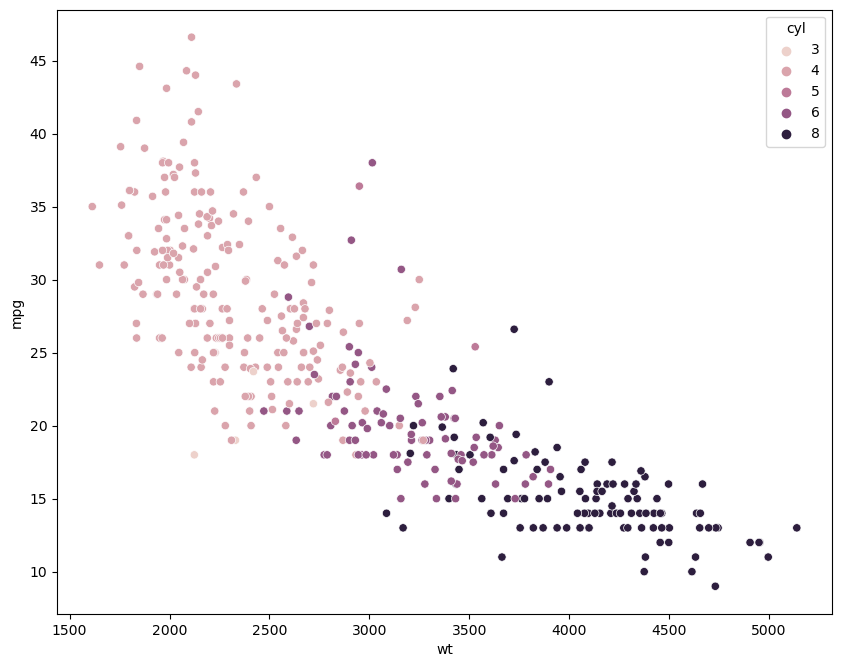

In [333]:
#2f
sns.scatterplot(c['wt'], c['mpg'],hue=c['cyl'])

#2g wt and mpg had linear downward trend, higher values of wt, the mpg decreases. for higher cyl numbers, the wt is more and mpg values is less.

In [334]:
#2h checked for unique values in each columns and found ? in hp column

c['hp'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [335]:
c.loc[c['hp']=='?']

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,?,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,?,3035,20.5,82,1


In [336]:
missing_values=['?']
c=c.replace(missing_values,np.NaN)
c

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,1


In [337]:
percentnull = c.isnull().sum() * 100 / len(c)
print(percentnull)

car_name    0.000000
mpg         0.000000
cyl         0.000000
disp        0.000000
hp          1.507538
wt          0.000000
acc         0.000000
yr          0.000000
origin      0.000000
dtype: float64


In [338]:
c.dropna(inplace=True)  # Droping the one the rows that have multiple missing values
c.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [339]:
#3A

from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

In [340]:
c1=c.iloc[:,1:]
cscale=c1.apply(zscore)

In [341]:
cscale

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641
...,...,...,...,...,...,...,...,...
393,0.455941,-0.864014,-0.520637,-0.480448,-0.221125,0.021294,1.636410,-0.716641
394,2.636813,-0.864014,-0.932079,-1.364896,-0.999134,3.287676,1.636410,0.526382
395,1.097374,-0.864014,-0.568479,-0.532474,-0.804632,-1.430430,1.636410,-0.716641
396,0.584228,-0.864014,-0.712005,-0.662540,-0.415627,1.110088,1.636410,-0.716641


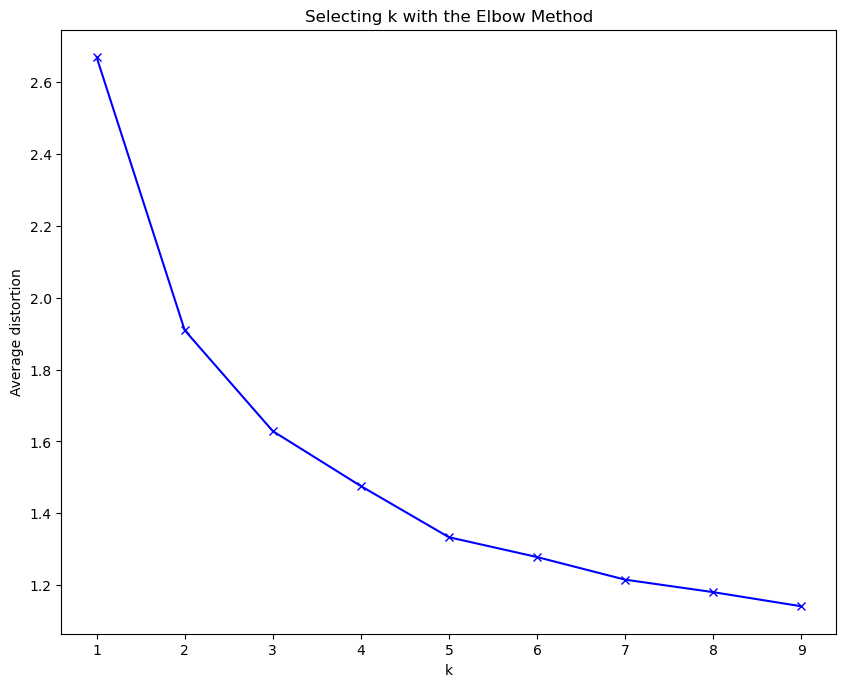

In [342]:
#3b

from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(cscale)
    prediction=model.predict(cscale)
    meanDistortions.append(sum(np.min(cdist(cscale, model.cluster_centers_, 'euclidean'), axis=1)) / cscale.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')

plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

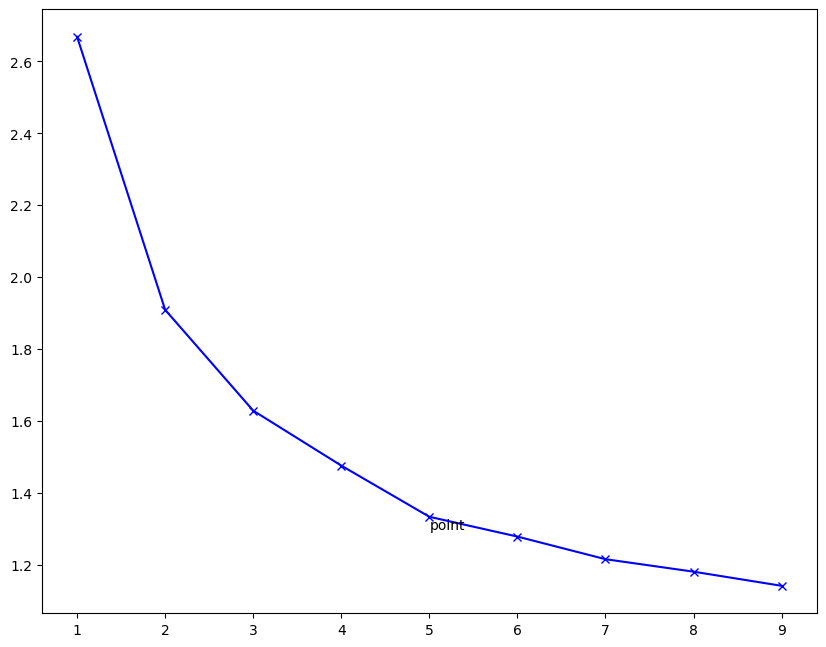

In [352]:
#3c
plt.annotate("point",(5,1.3))
plt.plot(clusters, meanDistortions, 'bx-')
plt.show()

In [344]:
#3d
# the slow reduces at mainly two points but after 5, there is less variations. Hence, selecting k as 5

# Let us first start with K = 5
final_model=KMeans(5)
final_model.fit(cscale)
prediction=final_model.predict(cscale)

#3e
cscale["cluster"] = prediction
print("Groups Assigned : \n")
cscale.head()

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,origin,cluster
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641,2
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641,2
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641,2
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641,2
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641,2


In [345]:
x=[0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641]
final_model.predict([x])

array([2], dtype=int32)

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wt', ylabel='disp'>

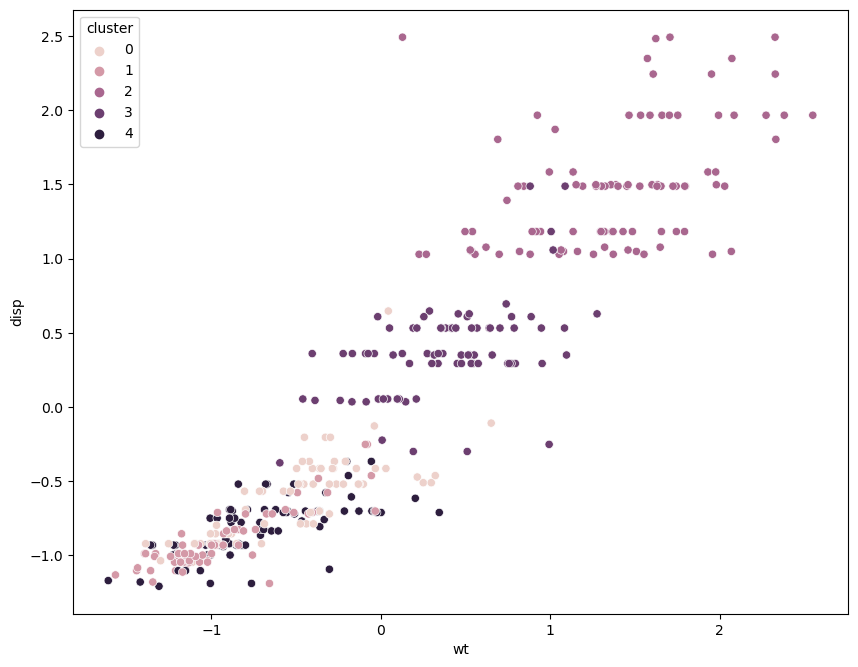

In [347]:
#3f
sns.scatterplot(cscale['wt'], cscale['disp'],hue=cscale['cluster'])

In [349]:
#3g
x=[18.0,8,307.0,130.0,3504,12.0,70,1]
final_model.predict([x])

array([2], dtype=int32)

PART B

In [155]:
#1A

df=pd.read_csv('/Users/abelabykuriakose/Downloads/vehicle.csv')

In [157]:
df.shape

(846, 19)

In [158]:
#1B
percentnull = df.isnull().sum() * 100 / len(c)
print(percentnull)

compactness                    0.000000
circularity                    1.275510
distance_circularity           1.020408
radius_ratio                   1.530612
pr.axis_aspect_ratio           0.510204
max.length_aspect_ratio        0.000000
scatter_ratio                  0.255102
elongatedness                  0.255102
pr.axis_rectangularity         0.765306
max.length_rectangularity      0.000000
scaled_variance                0.765306
scaled_variance.1              0.510204
scaled_radius_of_gyration      0.510204
scaled_radius_of_gyration.1    1.020408
skewness_about                 1.530612
skewness_about.1               0.255102
skewness_about.2               0.255102
hollows_ratio                  0.000000
class                          0.000000
dtype: float64


In [159]:
df.dropna(inplace=True)  # Droping the one the rows that have multiple missing values as the % is minimal
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

<AxesSubplot:ylabel='class'>

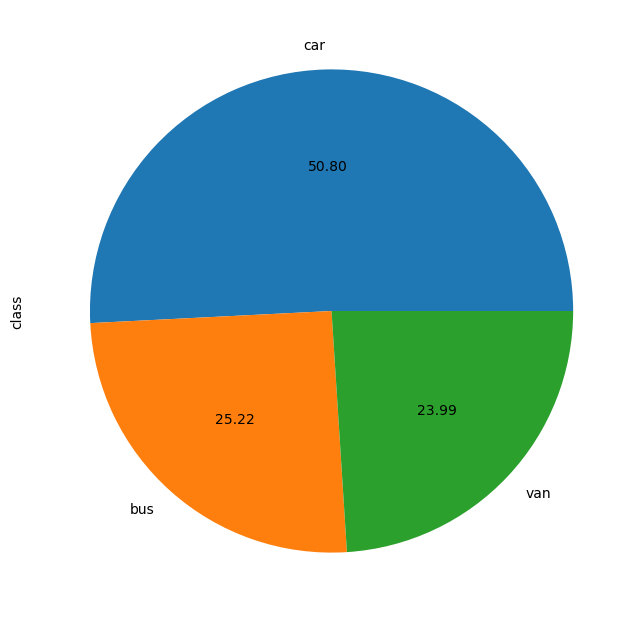

In [163]:
#1c
df['class'].value_counts().plot.pie(autopct='%.2f')

In [166]:
#1d
dupe=df.duplicated()
sum(dupe)

0

In [185]:
df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


In [253]:
#2a,2b

X = df.drop(labels= "class" , axis = 1)
y = df["class"]

In [254]:
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.20, random_state=1)

In [260]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [261]:
y_pred = classifier.predict(X_train)

In [262]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

         bus       0.94      0.96      0.95       169
         car       0.98      0.96      0.97       318
         van       0.96      0.98      0.97       163

    accuracy                           0.96       650
   macro avg       0.96      0.96      0.96       650
weighted avg       0.96      0.96      0.96       650



In [354]:
#3c
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(XScaled)

PCA(n_components=10)

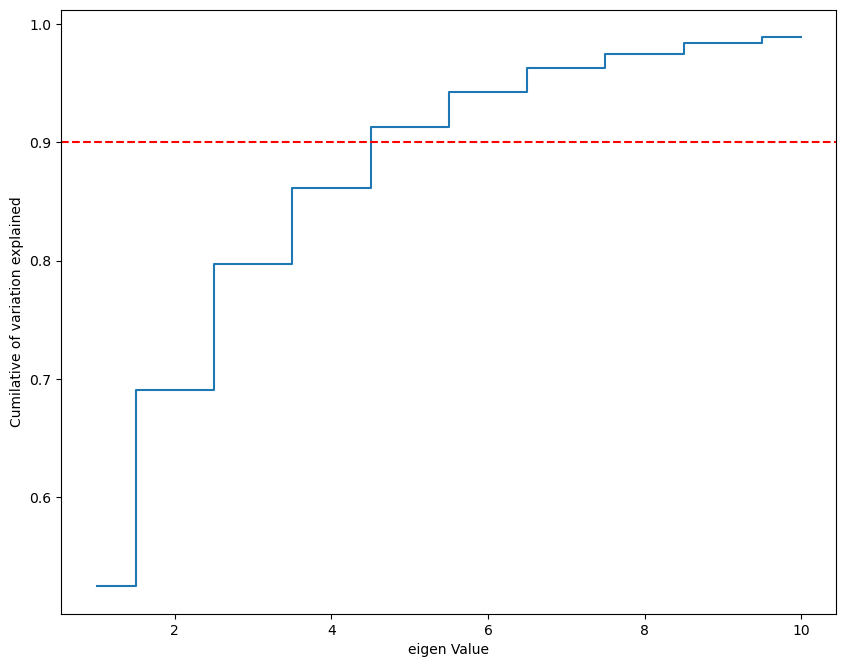

In [356]:
#3D,3E
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cumilative of variation explained')
plt.axhline(y = 0.9, color = 'r', linestyle = 'dashed', label = "red line")
plt.xlabel('eigen Value')
plt.show()

In [371]:
#3FThis time Select Minimum Components with 90% or above variance explained. taking a higher value above 90. 
#meets 90% at 5, 7 is close to 95%
pca3 = PCA(n_components=7)
pca3.fit(XScaled)
Xpca3 = pca3.transform(XScaled)


In [366]:
#3g,3h #4a

X_train, X_test, y_train, y_test = train_test_split(Xpca3, y, test_size=0.20, random_state=1)
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

         bus       0.74      0.80      0.77       169
         car       0.90      0.82      0.86       318
         van       0.86      0.94      0.90       163

    accuracy                           0.84       650
   macro avg       0.83      0.85      0.84       650
weighted avg       0.85      0.84      0.84       650



Even after considering only 7 component, there is an accuracy dip close to 10%. This can be tried be bettered with better tuning.

In [367]:
#4a

from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.1, 1, 10, 100], 'kernel': ['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6]}
grid=GridSearchCV(SVC(),parameters)   
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [1, 2, 3, 4, 5, 6],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [368]:
#4b
print(grid.best_params_)

{'C': 10, 'degree': 1, 'kernel': 'rbf'}


In [369]:
X_train, X_test, y_train, y_test = train_test_split(Xpca3, y, test_size=0.20, random_state=1)
classi = SVC(kernel = 'rbf', C = 10,degree=1)
classi.fit(X_train, y_train)
y_pred = classi.predict(X_train)

In [370]:
#4c
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

         bus       0.96      0.98      0.97       169
         car       0.98      0.96      0.97       318
         van       0.94      0.98      0.96       163

    accuracy                           0.97       650
   macro avg       0.96      0.97      0.97       650
weighted avg       0.97      0.97      0.97       650



In [ ]:
#with tuning, an accuracy of 97% is obtained. hence, with pca, and reduced features, it is giving a better accuracy

#5A.assumptions of PCA

1.Independent variables are considered to be highly correlated to each other.<p>
2.Variables included are metric level or nominal level.<p>
3.Features are low dimensional in nature.<p>
4.Independent variables are numeric in nature.<p>

#Explain advantages and limitations of PCA.

ADVANTAGES:<P>
1.Removes Correlated Features.After implementing the PCA on your dataset, all the Principal Components are independent of one another.<P>
2.Improves  Performance of the Algorithm.With so many features, the performance of your algorithm will drastically degrade.hence reducing the features ll help<P>
3.Reduces Overfitting<P>
<P><P>
Limitation:
1.Independent variables become less interpretable<P>
2.Data standardization is must before PCA<P>
3.Information Loss is a limitation<P>